In [1]:
import numpy as np
from scipy.fftpack import fft

import matplotlib.pyplot as plt
%matplotlib inline

## create an example signal

In [2]:
# Number of sample points
N = 600

# sample spacing
dt = 1.0 / 800.0
T = N * dt
dt, T

(0.00125, 0.75)

In [3]:
t = np.linspace(0.0, T, N)

In [4]:
w1 = 10
w2 = 25

In [5]:
y = np.sin(w1 * 2.0*np.pi * t) + 0.5*np.sin(w2 * 2.0*np.pi * t)

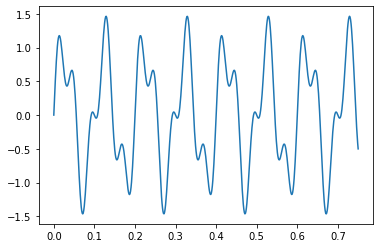

In [6]:
plt.plot(t, y)

In [7]:
yf = fft(y)

## convert to (angular) frequencies

From the `numpy.fft` [documentation](https://docs.scipy.org/doc/numpy/reference/routines.fft.html#module-numpy.fft):
```
The values in the result follow so-called “standard” order: If A = fft(a, n), then A[0] contains the zero-frequency term (the sum of the signal), which is always purely real for real inputs. Then A[1:n/2] contains the positive-frequency terms, and A[n/2+1:] contains the negative-frequency terms, in order of decreasingly negative frequency. For an even number of input points, A[n/2] represents both positive and negative Nyquist frequency, and is also purely real for real input. For an odd number of input points, A[(n-1)/2] contains the largest positive frequency, while A[(n+1)/2] contains the largest negative frequency
```

In [8]:
# omegas
def get_omegas(dt, N, positive_only=True, verbose=True):
    """convert timestep and number of steps to frequency domain"""
    if positive_only:
        factor = 2
    else:
        factor = 1
        
    max_w = 1.0 / (factor * dt)
    w = np.linspace(0.0, max_w, N // factor)
    
    if verbose:
        print(f'maximum frequency: {max_w}')
    return w

maximum frequency: 400.0


(0, 50)

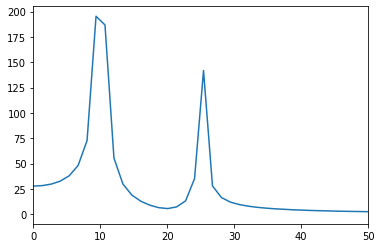

In [9]:
w = get_omegas(dt, N)
plt.plot(w, abs(yf[: N // 2]))
plt.xlim([0, 50])